# 09.06 Data Scaling

Data does not always come in a way our machine learning algorithms expects it.
We saw that concept a handful of times already:
we extracted extra features (e.g. polynomial features),
we did dimensionality reduction,
we used manifold techniques.
Yet, all these things may still fail against certain data.

![Wine](sl-wine.svg)

<div style="text-align:right;"><sup>sl-wine.svg</sup></div>

And we look at yet another dataset.
We import the usual stuff and the *wine dataset*,
which is an example of data that would fail a simple dimensionality reduction.

The set is made of chemical measurement over three different vineyards in Italy.
One can take it as a classification problem of attempting to identify the
vineyard from the chemical composition.
We will use is for dimensionality reduction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine = load_wine()
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

---

One should explore the data first.
We will simply plot as many dimensions as we can at once.

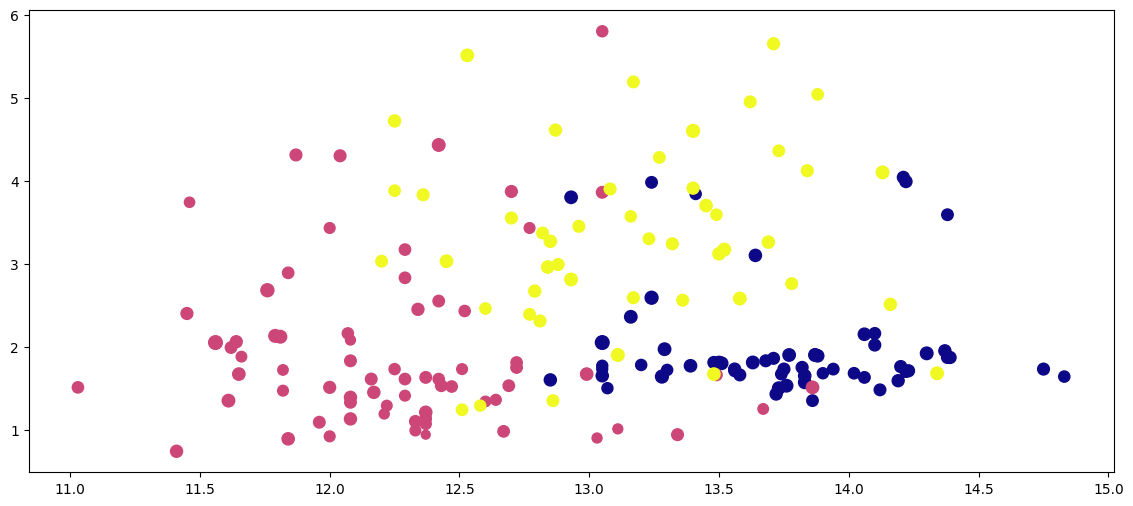

In [2]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(wine.data[:, 0], wine.data[:, 1], s=30*wine.data[:, 2], c=wine.target, cmap='plasma');

The classes seem to be difficult to separate.
Yet, we have just a few dimensions and a handful of samples,
therefore we can perform a full PCA and see whether we can project this data into a different space.

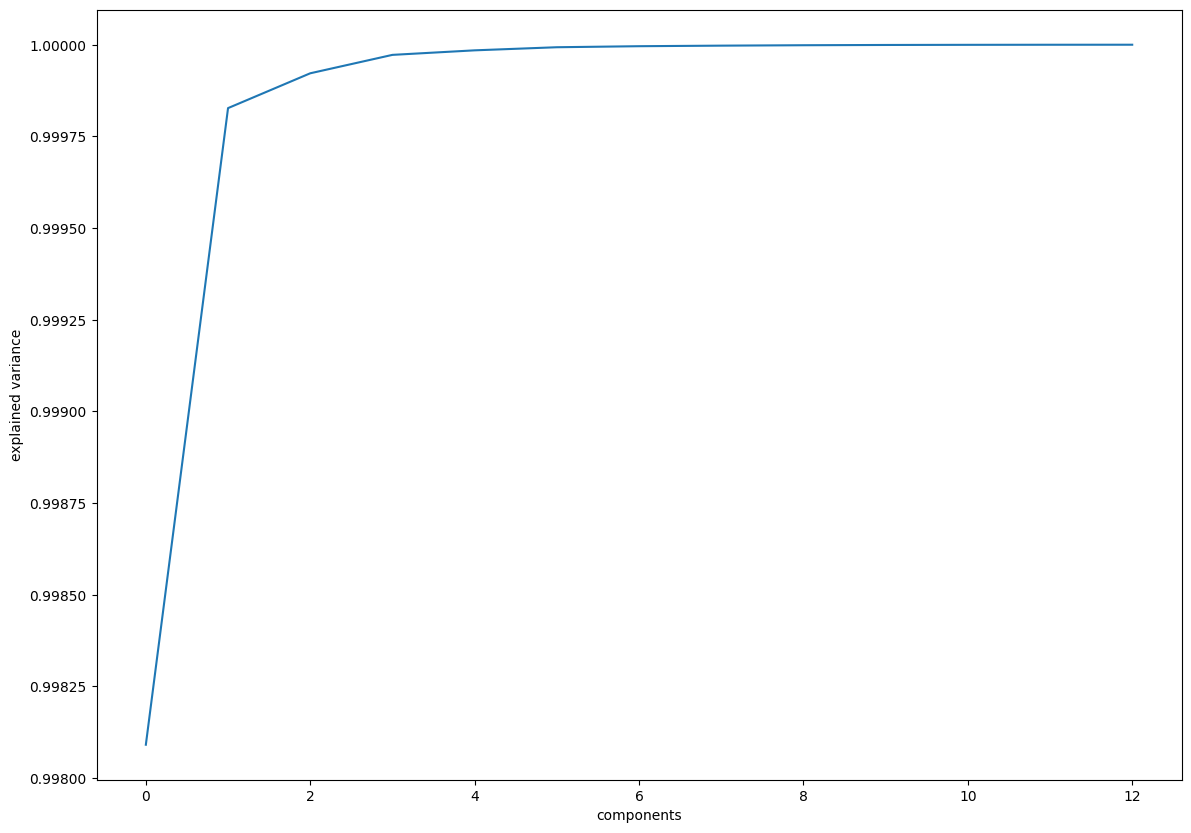

In [3]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(wine.data)
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='components', ylabel='explained variance');

Oh wow, two dimensional space seem to explain the data variance well enough.
And, since we can visualize a two dimensional space easily, we should do it.

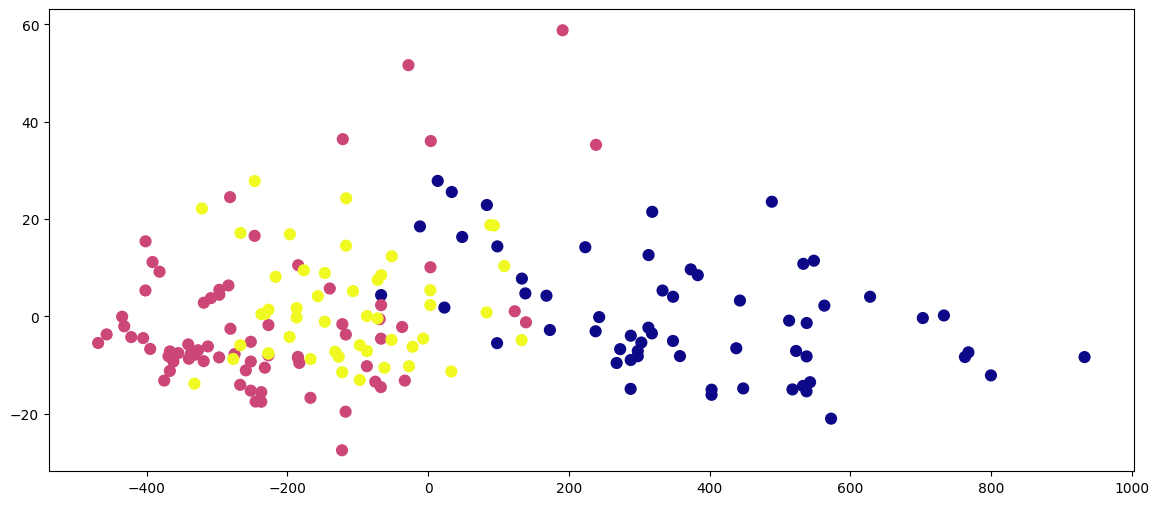

In [4]:
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine.data)
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(wine_pca[:, 0], wine_pca[:, 1], s=60, c=wine.target, cmap='plasma');

Despite the fact that we did dimensionality reduction the data does not look separable.
Let's try something different, let's describe this data using `pandas`.

In [5]:
df = pd.DataFrame(wine.data, columns=[wine.feature_names])
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


The values of *magnesium* and *proline* have completely different magnitudes from all other features.
These features have much bigger values than all the others,
and since PCA will evaluate variance based on the values alone,
it will take these two features as the main variance explanation.
In other words, instead of finding the main variance in the data PCA is simply finding these two features.

Until now we worked with PCA on images,
in which each dimension follows the same scale:
the possible values of the pixel which are from $0$ to $255$.
Such a well behaved set of dimensions is uncommon in most datasets,
notably if the data are not images.

Let's scale those things down and then apply PCA.
The `StandardScaler` centers the mean of every feature to zero,
and ensures that the variance of each feature is exactly one.

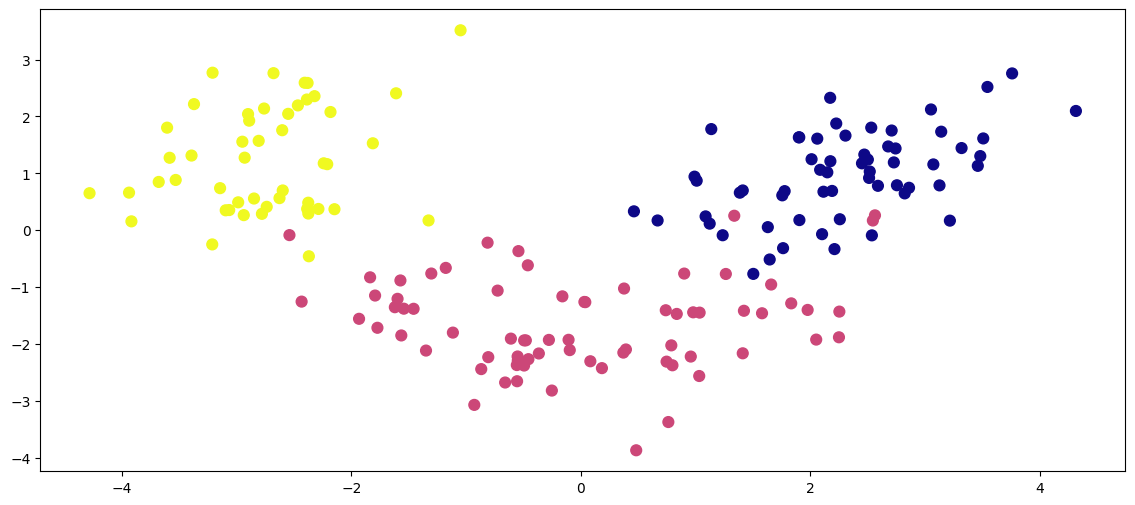

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

preprocess = make_pipeline(StandardScaler(), PCA(n_components=2))
wine_pca = preprocess.fit_transform(wine.data)
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(wine_pca[:, 0], wine_pca[:, 1], s=60, c=wine.target, cmap='plasma');

Now this is rather easy to separate.
And moreover, we probably do not need a complex classifier for it.

We have two take away messages here.
The first is that if we had believed that the PCA examples we have done
earlier are good representations for all data sets we would be in trouble
when faced with a dataset of non-images.
Not scaling the data before PCA is one of the most common mistakes
one makes when working with data preprocessing.

Another thing that we did not see before is the use of a pipeline
with two preprocessors.
We could now add a third `sklearn` object, perhaps a classifier,
to the pipeline and build a three piece pipeline.
A pipeline is not limited to two `sklearn` objects glued together,
often one may need a longer one.
The dataset after scaling is quite easy to classify,
we will leave the concatenation of a model to the pipeline
and classification to you.

## References

- [SciKit Learn - Importance of Feature Scaling][1]

[1]: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html